In [44]:
# General Setup
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [45]:
# Load each rule-based classification table
f17 = pd.read_csv('quarter_classification\\f17_r1_v0.csv')
w18 = pd.read_csv('quarter_classification\\w18_r1_v0.csv')
s18 = pd.read_csv('quarter_classification\\s18_r1_v0.csv')
f18 = pd.read_csv('quarter_classification\\f18_r1_v0.csv')
w19 = pd.read_csv('quarter_classification\\w19_r1_v0.csv')
s19 = pd.read_csv('quarter_classification\\s19_r1_v0.csv')

In [46]:
# Label users descripitively based on classification values
f17['quarter'] = "Fall 2017"
f17['resident'] = np.where(f17['label'] == 2.0, 'Static', 'Visitor')
f17['resident'] = np.where(pd.isna(f17['group']), f17['resident'], 'Resident')

w18['quarter'] = "Winter 2018"
w18['resident'] = np.where(w18['label'] == 2.0, 'Static', 'Visitor')
w18['resident'] = np.where(pd.isna(w18['group']), w18['resident'], 'Resident')

s18['quarter'] = "Spring 2018"
s18['resident'] = np.where(s18['label'] == 2.0, 'Static', 'Visitor')
s18['resident'] = np.where(pd.isna(s18['group']), s18['resident'], 'Resident')

f18['quarter'] = "Fall 2018"
f18['resident'] = np.where(f18['label'] == 2.0, 'Static', 'Visitor')
f18['resident'] = np.where(pd.isna(f18['group']), f18['resident'], 'Resident')

w19['quarter'] = "Winter 2019"
w19['resident'] = np.where(w19['label'] == 2.0, 'Static', 'Visitor')
w19['resident'] = np.where(pd.isna(w19['group']), w19['resident'], 'Resident')

s19['quarter'] = "Spring 2019"
s19['resident'] = np.where(s19['label'] == 2.0, 'Static', 'Visitor')
s19['resident'] = np.where(pd.isna(s19['group']), s19['resident'], 'Resident')

# Combine labeled tables
quarter_table_list = [f17, w18, s18, f18, w19, s19]
resident_df = pd.concat(quarter_table_list)

# Order in which quarters should be displayed
order_of_quarters = ['Fall 2017', 'Winter 2018', 'Spring 2018', 'Fall 2018', 'Winter 2019', 'Spring 2019']

# Convert the column corresponding to quarters into a categorical variable with the order specified previously
resident_df['quarter'] = pd.Categorical(resident_df['quarter'], categories=order_of_quarters, ordered=True)

# Remove static devices for clarity (negligible count)
resident_df_no_static = resident_df[resident_df['resident'] != "Static"]

# Removing classified residents that we lack sufficient data for
resident_df_correct_categories = resident_df[resident_df['group'] != "CLASS"]

# Remove static devices for clarity (negligible count) and classified residents that we lack sufficient data for
resident_df_correct_categories_no_static = resident_df[(resident_df['group'] != "CLASS") & (resident_df['resident'] != "Static")]

C:\Users\miska\AppData\Local\Temp\ipykernel_46396\2382698096.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = resident_df_no_static.groupby(['quarter', 'resident']).size().unstack(fill_value=0)
C:\Users\miska\AppData\Local\Temp\ipykernel_46396\2382698096.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(y*100)}%' for y in ax.get_yticks()])


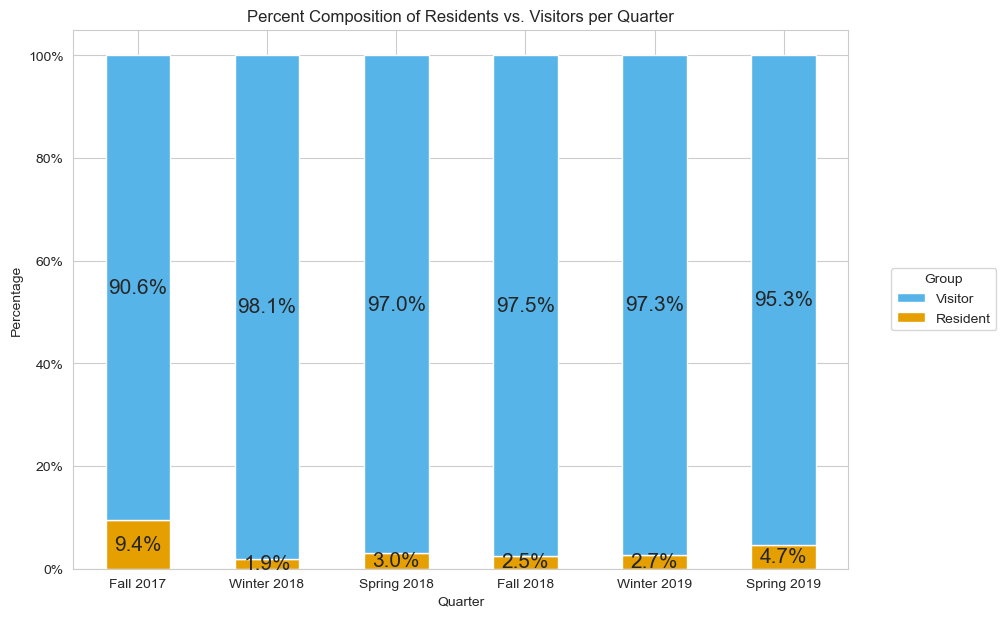

In [47]:
# Number of residents and visitors per quarter
counts = resident_df_no_static.groupby(['quarter', 'resident']).size().unstack(fill_value=0)

# Calculate proportions
proportions = counts.div(counts.sum(axis=1), axis=0)

# Plotting the stacked bar chart
ax = proportions.plot(kind='bar', stacked=True, figsize=(10, 7), color=["#E69F00", "#56B4E9"])

# Adding percentage labels to the sections of the bars
for c in ax.containers:
    labels = [f'{h:.1%}' if h > 0 else '' for h in c.datavalues]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=15)

# Setting the y-axis to display percentages
ax.set_yticklabels([f'{int(y*100)}%' for y in ax.get_yticks()])

# Setting the labels, title, and legend location
plt.xlabel('Quarter')
plt.ylabel('Percentage')
plt.title('Percent Composition of Residents vs. Visitors per Quarter')
plt.xticks(rotation=0)
plt.legend(title='Classification', loc='upper right')

# Moving and reordering the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Group', loc='center right', bbox_to_anchor=(1.2, .5))

# Showing the plot
plt.show()

C:\Users\miska\AppData\Local\Temp\ipykernel_46396\1673921670.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = resident_df.groupby(['quarter', 'resident']).size().unstack(fill_value=0)


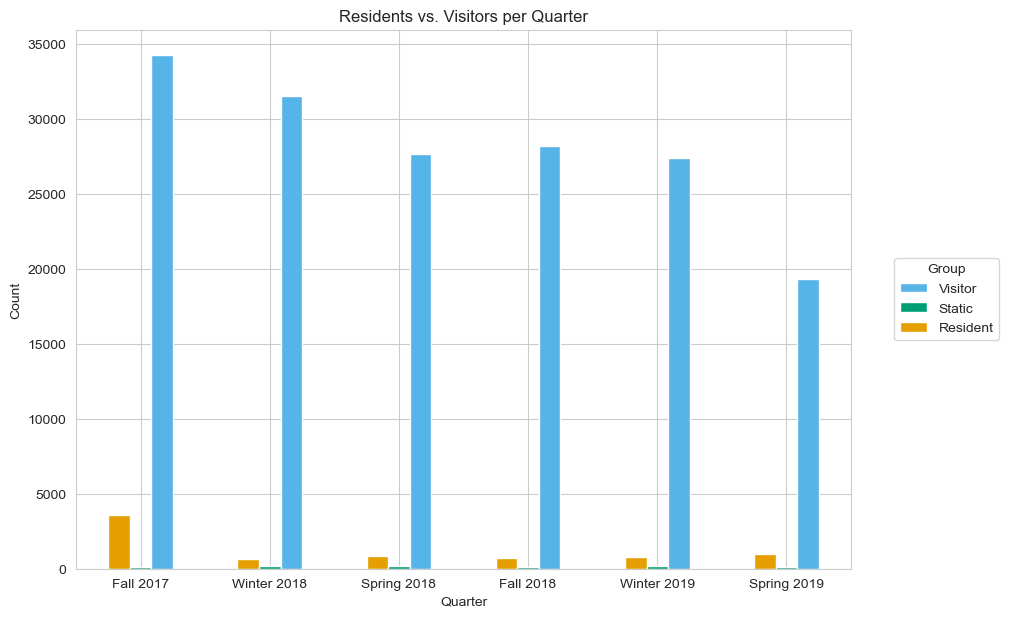

In [48]:
# Number of residents and visitors per quarter
counts = resident_df.groupby(['quarter', 'resident']).size().unstack(fill_value=0)

# Plotting the grouped bar chart
ax = counts.plot(kind='bar', figsize=(10, 7), color=["#E69F00", "#009E73", "#56B4E9"])

# Setting the labels, title, and legend location
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.title('Residents vs. Visitors per Quarter')
plt.xticks(rotation=0)
plt.legend(title='Classification', loc='upper right')

# Moving and reordering the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Group', loc='center right', bbox_to_anchor=(1.2, .5))

# Showing the plot
plt.show()

C:\Users\miska\AppData\Local\Temp\ipykernel_46396\3134240703.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = resident_df_correct_categories.groupby(['quarter', 'group']).size().unstack(fill_value=0)
C:\Users\miska\AppData\Local\Temp\ipykernel_46396\3134240703.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(y*100)}%' for y in ax.get_yticks()])


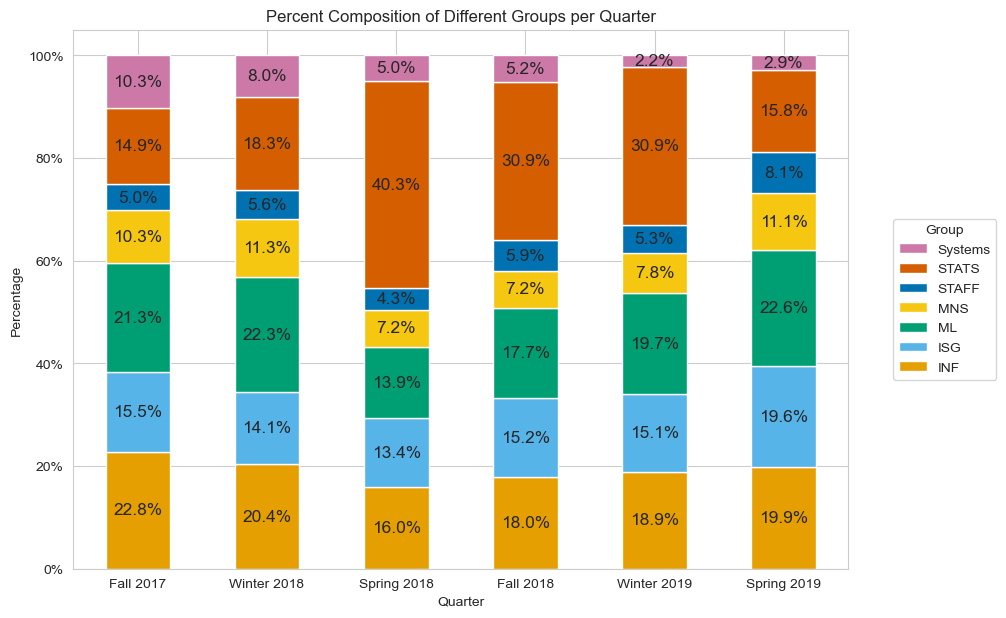

In [60]:
# Number of residents and visitors per quarter
counts = resident_df_correct_categories.groupby(['quarter', 'group']).size().unstack(fill_value=0)

# Calculate proportions
proportions = counts.div(counts.sum(axis=1), axis=0)

# Plotting the stacked bar chart
ax = proportions.plot(kind='bar', stacked=True, figsize=(10, 7), color=["#E69F00", "#56B4E9", "#009E73", "#F5C710", "#0072B2", "#D55E00", "#CC79A7"])

# Adding percentage labels to the sections of the bars
for c in ax.containers:
    labels = [f'{h:.1%}' if h > 0 else '' for h in c.datavalues]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=12.5)

# Setting the y-axis to display percentages
ax.set_yticklabels([f'{int(y*100)}%' for y in ax.get_yticks()])
        
# Setting the labels, title, and legend location
plt.xlabel('Quarter')
plt.ylabel('Percentage')
plt.title('Percent Composition of Different Groups per Quarter')
plt.xticks(rotation=0)
plt.legend(title='Classification', loc='center right')

# Moving and reordering the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Group', loc='center right', bbox_to_anchor=(1.2, .5))

# Showing the plot
plt.show()

C:\Users\miska\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


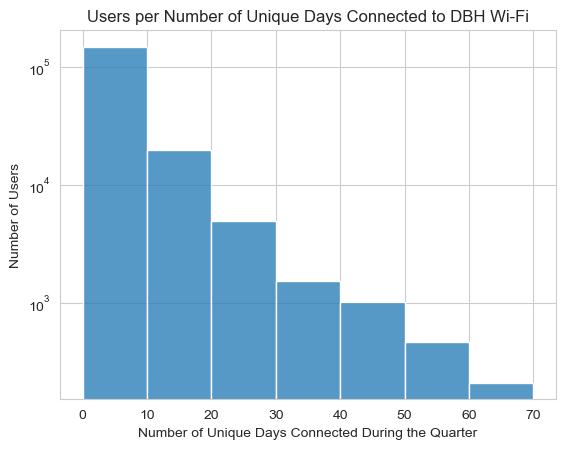

In [50]:
# Plotting the histogram
fig, ax = plt.subplots()
sns.set_style('whitegrid')
sns.histplot(ax=ax, data=resident_df['unique_days'], stat='count', bins=range(0, 80, 10))

# Setting title, labels, and scale
ax.set_title("Users per Number of Unique Days Connected to DBH Wi-Fi")
ax.set_xlabel("Number of Unique Days Connected During the Quarter")
ax.set_ylabel("Number of Users")
ax.set_yscale('log')

# Showing the plot
plt.show()

C:\Users\miska\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


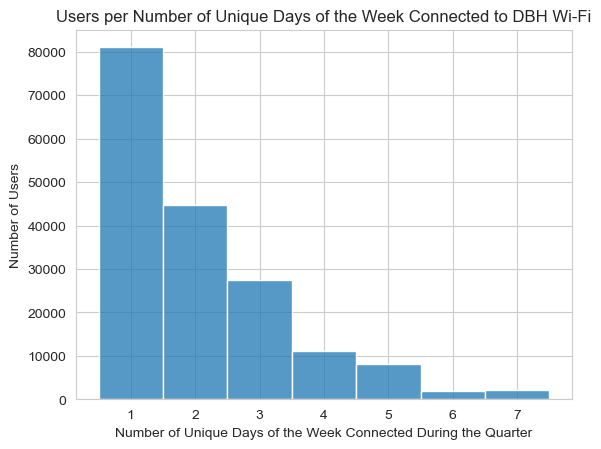

In [51]:
# Plotting the histogram
fig, ax = plt.subplots()
sns.set_style('whitegrid')
sns.histplot(ax=ax, data=resident_df['unique_DOWs'], discrete=True, stat='count')

# Setting title and labels
ax.set_title("Users per Number of Unique Days of the Week Connected to DBH Wi-Fi")
ax.set_xlabel("Number of Unique Days of the Week Connected During the Quarter")
ax.set_ylabel("Number of Users")

# Showing the plot
plt.show()

C:\Users\miska\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


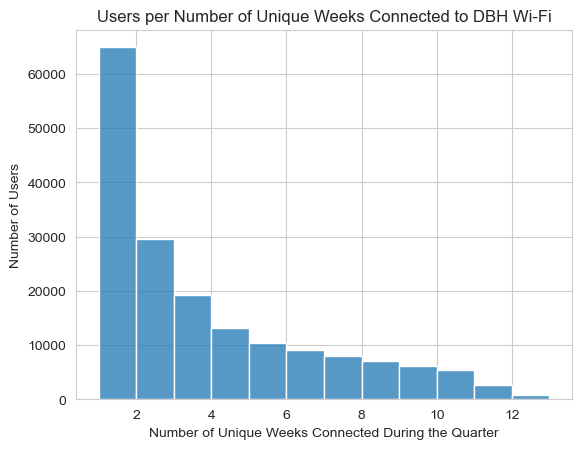

In [52]:
# Plotting the histogram
fig, ax = plt.subplots()
sns.set_style('whitegrid')
sns.histplot(ax=ax, data=resident_df['unique_weeks'], stat='count', bins=range(1, 14, 1))

# Setting title and labels
ax.set_title("Users per Number of Unique Weeks Connected to DBH Wi-Fi")
ax.set_xlabel("Number of Unique Weeks Connected During the Quarter")
ax.set_ylabel("Number of Users")

# Showing the plot
plt.show()

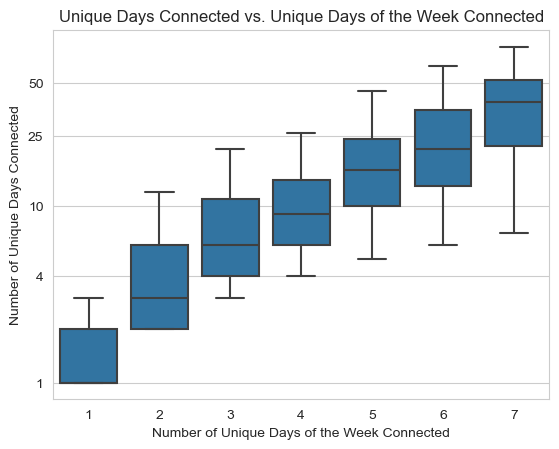

In [53]:
# Plotting the boxplot
fig, ax = plt.subplots()
sns.set_style('whitegrid')

# Excluding outliers for visual clarity
sns.boxplot(ax=ax, showfliers=False,
            x = resident_df['unique_DOWs'], 
            y = resident_df['unique_days'],
            color = 'tab:blue')

# Setting title, labels, and scale
ax.set_title("Unique Days Connected vs. Unique Days of the Week Connected")
ax.set_xlabel("Number of Unique Days of the Week Connected")
ax.set_ylabel("Number of Unique Days Connected")
ax.set_yscale('log')

# Setting axes ticks and format
plt.yticks([1,4,10,25,50])
ax.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())

# Showing the plot
plt.show()

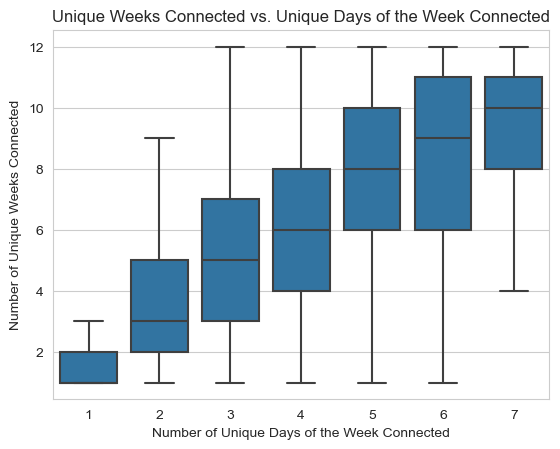

In [54]:
# Plotting the boxplot
fig, ax = plt.subplots()
sns.set_style('whitegrid')

# Excluding outliers for visual clarity
sns.boxplot(ax=ax, showfliers=False,
            x = resident_df['unique_DOWs'], 
            y = resident_df['unique_weeks'],
            color = 'tab:blue')

# Setting title and labels
ax.set_title("Unique Weeks Connected vs. Unique Days of the Week Connected")
ax.set_xlabel("Number of Unique Days of the Week Connected")
ax.set_ylabel("Number of Unique Weeks Connected")

# Showing the plot
plt.show()

C:\Users\miska\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\miska\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


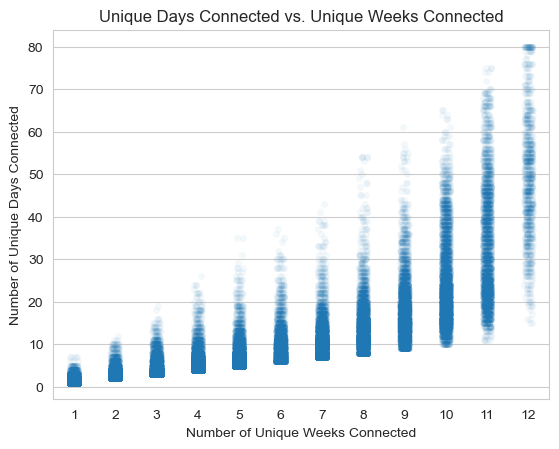

In [55]:
# Plotting the strip plot
fig, ax = plt.subplots()
sns.stripplot(ax=ax, alpha = 0.05,
                x = resident_df['unique_weeks'], 
                y = resident_df['unique_days'])

# Setting title and labels
ax.set_title("Unique Days Connected vs. Unique Weeks Connected")
ax.set_xlabel("Number of Unique Weeks Connected")
ax.set_ylabel("Number of Unique Days Connected")

# Showing the plot
plt.show()

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not array(['tab:blue', 'tab:blue', 'tab:blue', ..., 'tab:blue', 'tab:blue',
       'tab:blue'], dtype=object)

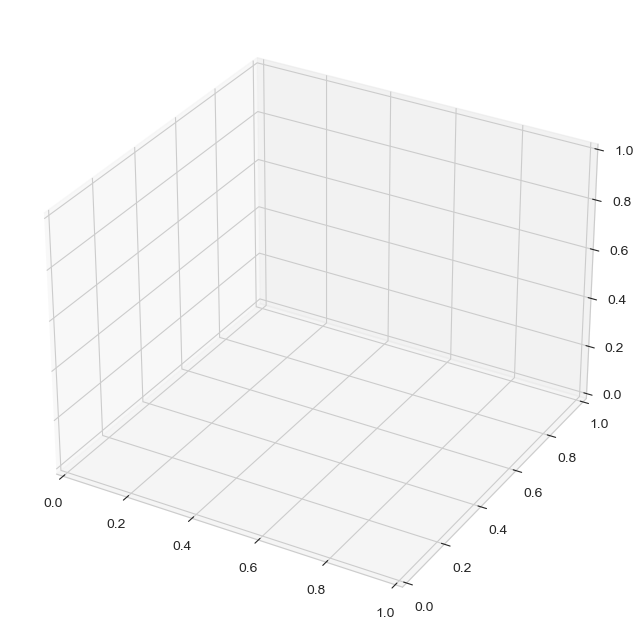

In [56]:
# Plotting the 3d scatter plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection = '3d')
colors = {'Resident' : 'tab:orange', 'Visitor' : 'tab:blue'}
ax.scatter(resident_df['unique_weeks'],
            resident_df['unique_DOWs'],
            resident_df['unique_days'],
            c = resident_df['resident'].map(colors))

# Setting the zoom amount
ax.set_box_aspect(aspect=None, zoom=0.9)

# Setting title and labels
ax.set_xlabel("Unique Weeks")
ax.set_ylabel("Unique Days of the Week")
ax.set_zlabel("Unique Days")
orange_patch = mpl.patches.Patch(color='tab:orange', label='Resident')
blue_patch = mpl.patches.Patch(color='tab:blue', label='Visitor')
ax.legend(handles=[orange_patch, blue_patch], title='Group', loc='center right', bbox_to_anchor=(1.25, .5))
ax.set_title("Resident and Visitor Classification 3D Plot", y=1)

# Showing the plot
plt.show()